A-B TESTING

BY: TAIBAT ABOWABA

**Case Study: Increasing Average Transactions in a Fintech company**
    
**Background:** A fintech company aims to increase the average transaction value of its users by 10% per month. To achieve this, the marketing team proposed sending a tutorial video to customers, explaining how to make easy and stress-free transfers. They believe that this initiative will result in an increase in the average transaction value per user each month.

However, the head of sales argued that the tutorial video would not lead to any significant change in transaction behavior. To validate both claims, it was decided to conduct an A/B test.

**Objective:** To validate both claims, it was decided to conduct an A/B test. This test will compare the average transaction values of two groups:

**Control Group:** Customers who do not receive the tutorial video.
    
**Test Group:** Customers who receive the tutorial video.
    
**Expected Outcome:** The A/B test aims to provide statistical evidence regarding the effectiveness of the tutorial in increasing transaction values, helping the company make informed decisions based on data.

<hr style="height: 2px; background-color: black; border: none;" />

**Hypotheses for the A/B Test**

**Null Hypothesis (H0):** The tutorial video will not lead to any significant change in transaction behavior among customers.

**Alternative Hypothesis (H1):** The tutorial video will help customers navigate the process of making seamless transfers, ultimately leading to an increase in average transaction values.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil
%matplotlib inline

In [2]:
# Performing a power analysis to determine the sample size needed for statistical tests.
size= sms.NormalIndPower().solve_power(0.10, power=0.80, alpha=0.05, ratio=1)
size=ceil(size)
print(f'The sample size required for each group is: {size}')

The sample size required for each group is: 1570


In [3]:
# generating a synthetic dataset for testing and analysis
np.random.seed(0)
rows=10000
user_id=np.arange(1, rows+1,1)
group= np.random.choice(['test','control'], size=rows)
transfers_completed_test=np.random.normal(7,2, size=(rows//2)).clip(0).round().astype('int')
transfers_completed_control=np.random.normal(5,2, size=(rows//2)).clip(0).round().astype('int')
transfers_completed=np.concatenate([transfers_completed_control, transfers_completed_test])
np.random.shuffle(transfers_completed)
signup_date = pd.date_range(start='2023-01-01', end='2023-12-01', periods=rows).date
age= np.random.randint(18,65, rows)
gender= np.random.choice(['female','male'], size=rows)
signup_method=np.random.choice(['email','social media'], size=rows)

In [4]:
ab_test= pd.DataFrame({'user_id':user_id, 'group':group,'transfers_completed':transfers_completed,
                      'signup_date':signup_date,'age':age,'gender':gender,'signup_method':signup_method})

In [5]:
ab_test

,user_id,group,transfers_completed,signup_date,age,gender,signup_method
0,1,test,9,2023-01-01,31,female,email
1,2,control,6,2023-01-01,61,male,social media
2,3,control,7,2023-01-01,55,female,social media
3,4,test,13,2023-01-01,32,male,email
4,5,control,8,2023-01-01,53,female,social media
...,...,...,...,...,...,...,...
9995,9996,test,4,2023-11-30,57,female,email
9996,9997,control,3,2023-11-30,34,male,email
9997,9998,test,9,2023-11-30,62,female,email
9998,9999,control,7,2023-11-30,29,male,email


There are **10,000** rows in the DataFrame, each representing a cummulative of a user total engagement, as well as **6 columns**

- **user_id** - The **user ID** is the unique identifier
- **group** - The group the user belong to
- **transfers_completed** - Number of completed transfers through out the session
- **signup_date** - The date when the user signed up
- **age** - Age of users
- **gender** - Gender of users
- **signup_method** - How the user signed up

In [6]:
# checking for datatypes
ab_test.dtypes

user_id                 int32
group                  object
transfers_completed     int32
signup_date            object
age                     int32
gender                 object
signup_method          object
dtype: object

In [7]:
# checking for null values
ab_test.isnull().sum()

user_id                0
group                  0
transfers_completed    0
signup_date            0
age                    0
gender                 0
signup_method          0
dtype: int64

In [8]:
# examining the distribution of values in each group
ab_test['group'].value_counts()

group
control    5085
test       4915
Name: count, dtype: int64

In [9]:
# checking if users appeared more than once
sessions= ab_test['user_id'].value_counts()
multi_session= sessions[sessions>1].count()
print(f'There are {multi_session} of people that appeared more than once')

There are 0 of people that appeared more than once


In [10]:
# fetching random 1570 samples from the result of our campaign (dataframe) for each groups required for our test
size=1570
test_group=ab_test[ab_test['group']=='test'].sample(size, random_state=22)
control_group=ab_test[ab_test['group']=='control'].sample(size, random_state=22)
ab_tests=pd.concat([test_group,control_group]).reset_index(drop=True)
ab_tests

,user_id,group,transfers_completed,signup_date,age,gender,signup_method
0,2784,test,4,2023-04-03,33,male,email
1,9146,test,5,2023-11-02,42,female,social media
2,7813,test,8,2023-09-18,27,male,social media
3,455,test,4,2023-01-16,22,female,email
4,2847,test,5,2023-04-06,50,male,social media
...,...,...,...,...,...,...,...
3135,9437,control,7,2023-11-12,29,female,email
3136,9728,control,3,2023-11-21,43,female,email
3137,9760,control,6,2023-11-22,49,male,social media
3138,6490,control,6,2023-08-05,62,male,email


In [11]:
# confirming we have the required sample size for each group
ab_tests['group'].value_counts()

group
test       1570
control    1570
Name: count, dtype: int64

In [12]:
# calculating the mean, standard deviation and standard error for each group
test_con= ab_tests.groupby('group')['transfers_completed']
std_v= lambda x: np.std(x, ddof=0)
std_e= lambda x: stats.sem(x, ddof=0)
conversion_rates = test_con.agg([np.mean, std_v, std_e])
conversion_rates.columns=['mean', 'std_dev', 'std_e' ]
conversion_rates.style.format('{:.3f}')

,mean,std_dev,std_e
group,,,
control,6.031,2.229,0.056
test,5.962,2.220,0.056


- The test results indicate that the control group performed better than the test group in terms of average transactions completed. We now need to statistically assess the significance of this difference

Text(0, 0.5, 'Average transaction completed')

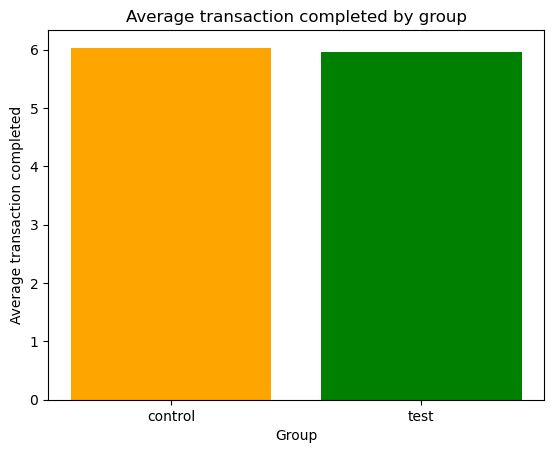

In [13]:
# representing the average transactions completed for each group with a bar chart to visualize their variations
ab_testt=ab_tests.groupby('group')['transfers_completed'].mean().reset_index()
colors=['orange','green']
plt.bar(ab_testt['group'], ab_testt['transfers_completed'], color=colors)
plt.title('Average transaction completed by group')
plt.xlabel('Group')
plt.ylabel('Average transaction completed')

In [14]:
# splitting dataframe to perform a two-tailed, two-sample t-test
test_result=ab_tests[ab_tests['group']=='test']['transfers_completed'].reset_index()
control_result=ab_tests[ab_tests['group']=='control']['transfers_completed'].reset_index()

In [15]:
# calculating the t-statistic, p-value, and showing the critical value for a 95% confidence level
from scipy import stats

t_stat, p_value = stats.ttest_ind(test_result['transfers_completed'], control_result['transfers_completed'])
critical_value = stats.norm.ppf(1 - 0.05/2)

print(f't_stat : {t_stat:.3f}')
print(f'p_value : {p_value:.3f}')
print(f'critical value: {critical_value:.2f}')

t_stat : -0.874
p_value : 0.382
critical value: 1.96


**What the results interprets:**

**P-value:** Since the p-value (0.382) is greater than α (0.05), we fail to reject the null hypothesis.

**T-statistic:** A t-statistic of -0.874 indicates that the test group's performance is not significantly different from the control group's performance, and in fact, it suggests that the test group performed worse, but this difference is not significant.
    
**Critical Value:** The critical value of ±1.96 sets the boundary for statistical significance. For a significant result, 
the t-statistic would need to fall outside this range (i.e., less than -1.96 or greater than +1.96). Since -0.874 is well within this range, this further supports failing to reject the null hypothesis.

**Conclusion:** 
We do not accept the alternative hypothesis (H1) because the evidence does not support that the test group improved significantly.
The result indicates that the control group performed better than the test group, but this difference is not statistically significant. Therefore, we can conclude that the performance difference could likely be due to chance, rather than a true effect of the tutorial.

<hr style="height: 2px; background-color: black; border: none;" />

**Recommendation:**
Since the test did not show significant improvement, we might want to explore:
    
- **Reasons for the lack of improvement:** We should figure whether the tutorial was effective, engaging, or necessary.
- **Adjustments:** Perhaps improve the tutorial content or delivery and conduct further testing to gather more data.
- **User Feedback:** Conduct interviews or focus groups to understand user experiences and gather insights for improvement.
- **A/B Testing Formats:** Experiment with different tutorial formats (e.g., video vs. written) to find the most effective one.
- **Segmented Targeting:** Tailor tutorials based on user demographics or experience levels for personalized learning.
- **Follow-Up Support:** Implement reminders and additional support post-tutorial to reinforce learning.
- **Influencer Collaboration:** Partner with trusted figures for webinars or live sessions to increase credibility.
- **Social Proof:** Showcase testimonials or success stories from users who benefited from the tutorial.
- **Iterative Testing:** Continuously gather data and refine the tutorial based on user feedback.